In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
from scipy import stats

#Import matplotlib for creating and plotting graphs
import matplotlib.pyplot as plt

# import gmaps
import geopandas as gpd

# Import models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Show path to csv files
data_2015_path = "Resources/2015.csv"
data_2016_path = "Resources/2016.csv"
data_2017_path = "Resources/2017.csv"
data_2018_path = "Resources/2018.csv"
data_2019_path = "Resources/2019.csv"

# Read csv files through Pandas
data_2015 = pd.read_csv(data_2015_path)
data_2016 = pd.read_csv(data_2016_path)
data_2017 = pd.read_csv(data_2017_path)
data_2018 = pd.read_csv(data_2018_path)
data_2019 = pd.read_csv(data_2019_path)


# Adding year suffix to columns
data_2015 = data_2015.rename(columns={col: col + " 2015" for col in data_2015.columns if col not in ['Country', 'Region']})
data_2016 = data_2016.rename(columns={col: col + " 2016" for col in data_2016.columns if col not in ['Country', 'Region']})
data_2017 = data_2017.rename(columns={col: col + " 2017" for col in data_2017.columns if col not in ['Country', 'Region']})
data_2018 = data_2018.rename(columns={col: col + " 2018" for col in data_2018.columns if col not in ['Country', 'Region']})
data_2019 = data_2019.rename(columns={col: col + " 2019" for col in data_2019.columns if col not in ['Country', 'Region']})


# Merging Data on Country and Region
complete_data = pd.merge(data_2015, data_2016, on = ["Country", "Region"], how = "outer")
complete_data = pd.merge(complete_data, data_2017, on = ["Country", "Region"], how = "outer")
complete_data = pd.merge(complete_data, data_2018, on = ["Country", "Region"], how = "outer")
complete_data = pd.merge(complete_data, data_2019, on = ["Country", "Region"], how = "outer")

# Removing data with incomplete values
complete_data = complete_data.dropna()
complete_data

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Economy (GDP per Capita) 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,...,Trust (Government Corruption) 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,Economy (GDP per Capita) 2019,Family 2019,Health (Life Expectancy) 2019,Freedom 2019,Trust (Government Corruption) 2019,Generosity 2019
0,Switzerland,Western Europe,1.0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,...,0.357,0.256,6.0,7.480,1.452,1.526,1.052,0.572,0.343,0.263
1,Iceland,Western Europe,2.0,7.561,1.302,1.402,0.948,0.629,0.141,0.436,...,0.138,0.353,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354
2,Denmark,Western Europe,3.0,7.527,1.325,1.361,0.875,0.649,0.484,0.341,...,0.408,0.284,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252
3,Norway,Western Europe,4.0,7.522,1.459,1.331,0.885,0.670,0.365,0.347,...,0.340,0.286,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271
4,Canada,North America,5.0,7.427,1.326,1.323,0.906,0.633,0.330,0.458,...,0.291,0.321,9.0,7.278,1.365,1.505,1.039,0.584,0.308,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154.0,3.465,0.222,0.774,0.429,0.592,0.552,0.226,...,0.444,0.200,152.0,3.334,0.359,0.711,0.614,0.555,0.411,0.217
154,Benin,Sub-Saharan Africa,155.0,3.340,0.287,0.354,0.319,0.485,0.080,0.183,...,0.067,0.163,102.0,4.883,0.393,0.437,0.397,0.349,0.082,0.175
155,Syria,Middle East and Northern Africa,156.0,3.006,0.663,0.475,0.722,0.157,0.189,0.472,...,0.144,0.376,149.0,3.462,0.619,0.378,0.440,0.013,0.141,0.331
156,Burundi,Sub-Saharan Africa,157.0,2.905,0.015,0.416,0.224,0.119,0.101,0.197,...,0.076,0.149,145.0,3.775,0.046,0.447,0.380,0.220,0.180,0.176


In [2]:
# 2015 Data summary of mean and maximum
data_2015_summary = data_2015.loc[:, "Economy (GDP per Capita) 2015":].agg(["mean", "max"])
data_2015_summary

# 2016 Data summary of mean and maximum
data_2016_summary = data_2016.loc[:, "Economy (GDP per Capita) 2016":].agg(["mean", "max"])
data_2016_summary

# 2017 Data summary of mean and maximum
data_2017_summary = data_2017.loc[:, "Economy (GDP per Capita) 2017":].agg(["mean", "max"])
data_2017_summary

# 2018 Data summary of mean and maximum
data_2018_summary = data_2018.loc[:, "Economy (GDP per Capita) 2018":].agg(["mean", "max"])
data_2018_summary

# 2019 Data summary of mean and maximum (for Iceland  -->  maybe?)
data_2019_summary = data_2019.loc[:"Iceland", "Economy (GDP per Capita) 2019":].agg(["mean", "max"])
data_2019_summary

,Economy (GDP per Capita) 2019,Family 2019,Health (Life Expectancy) 2019,Freedom 2019,Trust (Government Corruption) 2019,Generosity 2019
mean,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846
max,1.684000,1.624000,1.141000,0.631000,0.453000,0.566000


In [3]:
# Summary of Happiness Rank per year
happiness_ranking = complete_data[["Country", "Region", "Happiness Rank 2015","Happiness Rank 2016","Happiness Rank 2017","Happiness Rank 2018","Happiness Rank 2019"]]
happiness_ranking

# Summary of Happiness Score per year
happiness_score = complete_data[["Country", "Region", "Happiness Score 2015","Happiness Score 2016","Happiness Score 2017","Happiness Score 2018","Happiness Score 2019"]]
happiness_score

# Summary of Economy GDP per year
economy_gdp = complete_data[["Country", "Region", "Economy (GDP per Capita) 2015","Economy (GDP per Capita) 2016","Economy (GDP per Capita) 2017","Economy (GDP per Capita) 2018","Economy (GDP per Capita) 2019"]]
economy_gdp

# Summary of Family per year
family = complete_data[["Country", "Region", "Family 2015","Family 2016","Family 2017","Family 2018","Family 2019"]]
family

# Summary of Life Expectancy per year
life_expectancy = complete_data[["Country", "Region", "Health (Life Expectancy) 2015","Health (Life Expectancy) 2016","Health (Life Expectancy) 2017","Health (Life Expectancy) 2018","Health (Life Expectancy) 2019"]]
life_expectancy

# Summary of Freedom per year
freedom = complete_data[["Country", "Region", "Freedom 2015","Freedom 2016","Freedom 2017","Freedom 2018","Freedom 2019"]]
freedom

# Summary of Government Trust Rank per year
government_trust = complete_data[["Country", "Region", "Trust (Government Corruption) 2015","Trust (Government Corruption) 2016","Trust (Government Corruption) 2017","Trust (Government Corruption) 2018","Trust (Government Corruption) 2019"]]
government_trust

# Summary of Genorosity per year
generosity = complete_data[["Country", "Region", "Generosity 2015","Generosity 2016","Generosity 2017","Generosity 2018","Generosity 2019"]]
generosity

,Country,Region,Generosity 2015,Generosity 2016,Generosity 2017,Generosity 2018,Generosity 2019
0,Switzerland,Western Europe,0.297,0.281,0.291,0.256,0.263
1,Iceland,Western Europe,0.436,0.477,0.476,0.353,0.354
2,Denmark,Western Europe,0.341,0.362,0.355,0.284,0.252
3,Norway,Western Europe,0.347,0.379,0.362,0.286,0.271
4,Canada,North America,0.458,0.448,0.436,0.321,0.285
...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,0.226,0.236,0.253,0.200,0.217
154,Benin,Sub-Saharan Africa,0.183,0.202,0.208,0.163,0.175
155,Syria,Middle East and Northern Africa,0.472,0.484,0.494,0.376,0.331
156,Burundi,Sub-Saharan Africa,0.197,0.203,0.204,0.149,0.176


In [4]:
# Region Summary of averages of each characteristic
region_summary = complete_data.groupby("Region")
region_summary.mean()

,Happiness Rank 2015,Happiness Score 2015,Economy (GDP per Capita) 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,Happiness Rank 2016,Happiness Score 2016,...,Trust (Government Corruption) 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,Economy (GDP per Capita) 2019,Family 2019,Health (Life Expectancy) 2019,Freedom 2019,Trust (Government Corruption) 2019,Generosity 2019
Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,1.292000,1.314500,0.920000,0.645000,0.392500,0.455500,8.500000,7.323500,...,0.345500,0.363000,9.500000,7.267500,1.337500,1.552500,1.031000,0.571000,0.335000,0.331000
Central and Eastern Europe,78.500000,5.344571,0.943250,1.054821,0.718107,0.359071,0.087821,0.149643,77.857143,5.379607,...,0.062643,0.131571,70.500000,5.571786,1.022429,1.340393,0.808500,0.357964,0.062750,0.141214
Eastern Asia,69.250000,5.496250,1.058500,1.115750,0.844000,0.445250,0.078750,0.176750,73.500000,5.477000,...,0.084000,0.134000,72.000000,5.564250,1.151250,1.323500,0.921000,0.360500,0.083500,0.134250
Latin America and Caribbean,47.550000,6.137300,0.854200,1.107450,0.713050,0.494150,0.121550,0.215100,50.500000,6.050500,...,0.079300,0.137850,52.000000,5.942550,0.908950,1.332850,0.816800,0.438500,0.074850,0.142600
Middle East and Northern Africa,83.888889,5.243556,1.030611,0.900167,0.696667,0.331167,0.162389,0.185000,80.888889,5.320111,...,0.122944,0.159556,88.444444,5.148778,1.034389,1.139722,0.746944,0.302389,0.100722,0.147444
North America,10.000000,7.273000,1.360500,1.285000,0.884000,0.589500,0.244500,0.429500,9.500000,7.254000,...,0.212000,0.306000,14.000000,7.085000,1.399000,1.481000,0.956500,0.519000,0.218000,0.282500
Southeastern Asia,79.000000,5.372625,0.813750,0.965625,0.693375,0.552125,0.139750,0.419000,77.250000,5.396750,...,0.123750,0.321375,82.625000,5.333375,0.950750,1.273500,0.769625,0.543375,0.118375,0.306250
Southern Asia,113.142857,4.580857,0.560429,0.645286,0.540857,0.373286,0.102571,0.341429,111.714286,4.563286,...,0.097857,0.243571,115.857143,4.526857,0.650286,0.986857,0.617000,0.386286,0.093429,0.234714
Sub-Saharan Africa,131.096774,4.120419,0.381387,0.806935,0.299484,0.381484,0.111710,0.221452,131.806452,4.074839,...,0.085097,0.177806,122.322581,4.380323,0.466226,0.938097,0.440839,0.342226,0.087645,0.188290


In [5]:
region_summary = complete_data.groupby("Region")

pd.DataFrame(region_summary.size().reset_index(name = "Happiness Score"))

,Region,Happiness Score
0,Australia and New Zealand,2
1,Central and Eastern Europe,28
2,Eastern Asia,4
3,Latin America and Caribbean,20
4,Middle East and Northern Africa,18
5,North America,2
6,Southeastern Asia,8
7,Southern Asia,7
8,Sub-Saharan Africa,31
9,Western Europe,20


In [6]:
# Summary of Happiness Score per year
happiness_score = complete_data[["Country", "Region", "Happiness Score 2015","Happiness Score 2016","Happiness Score 2017","Happiness Score 2018","Happiness Score 2019"]]
happiness_score


,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554
4,Canada,North America,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,3.515,3.471,3.408,3.334
154,Benin,Sub-Saharan Africa,3.340,3.484,3.657,4.141,4.883
155,Syria,Middle East and Northern Africa,3.006,3.069,3.462,3.462,3.462
156,Burundi,Sub-Saharan Africa,2.905,2.905,2.905,2.905,3.775


In [7]:
# Total avaerage Happiness Score per Country and Region
happiness_score ['Total Average Happiness Score'] = happiness_score.mean(axis=1)

sorted_happiness_score = happiness_score.sort_values('Total Average Happiness Score', ascending=False)

sorted_happiness_score


c:\users\alysh\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Total Average Happiness Score
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.5460
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,7.5410
5,Finland,Western Europe,7.406,7.413,7.469,7.632,7.769,7.5378
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5114
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5110
...,...,...,...,...,...,...,...,...
152,Afghanistan,Southern Asia,3.575,3.360,3.794,3.632,3.203,3.5128
145,Tanzania,Sub-Saharan Africa,3.781,3.666,3.349,3.303,3.231,3.4660
153,Rwanda,Sub-Saharan Africa,3.465,3.515,3.471,3.408,3.334,3.4386
155,Syria,Middle East and Northern Africa,3.006,3.069,3.462,3.462,3.462,3.2922


In [8]:
region_happiness_score = sorted_happiness_score[["Country","Region","Total Average Happiness Score"]]
region_happiness_score.head(10)

,Country,Region,Total Average Happiness Score
2,Denmark,Western Europe,7.5460
3,Norway,Western Europe,7.5410
5,Finland,Western Europe,7.5378
0,Switzerland,Western Europe,7.5114
1,Iceland,Western Europe,7.5110
6,Netherlands,Western Europe,7.4046
4,Canada,North America,7.3506
7,Sweden,Western Europe,7.3192
8,New Zealand,Australia and New Zealand,7.3130
9,Australia,Australia and New Zealand,7.2762


In [32]:
region_happiness_score.nlargest(10, ['Total Average Happiness Score'])

,Country,Region,Total Average Happiness Score
2,Denmark,Western Europe,7.5460
3,Norway,Western Europe,7.5410
5,Finland,Western Europe,7.5378
0,Switzerland,Western Europe,7.5114
1,Iceland,Western Europe,7.5110
6,Netherlands,Western Europe,7.4046
4,Canada,North America,7.3506
7,Sweden,Western Europe,7.3192
8,New Zealand,Australia and New Zealand,7.3130
9,Australia,Australia and New Zealand,7.2762


In [9]:
region_happiness_score.tail(10)

,Country,Region,Total Average Happiness Score
115,Liberia,Sub-Saharan Africa,3.8392
127,Botswana,Sub-Saharan Africa,3.8300
146,Madagascar,Sub-Saharan Africa,3.7454
135,Yemen,Middle East and Northern Africa,3.6258
157,Togo,Sub-Saharan Africa,3.5442
152,Afghanistan,Southern Asia,3.5128
145,Tanzania,Sub-Saharan Africa,3.4660
153,Rwanda,Sub-Saharan Africa,3.4386
155,Syria,Middle East and Northern Africa,3.2922
156,Burundi,Sub-Saharan Africa,3.0790


## Scatter Plots per characteristics

### Average Economy (GDP per Capita)

In [10]:
# Summary of Economy GDP per year
economy_gdp = complete_data[["Country", "Region", "Economy (GDP per Capita) 2015","Economy (GDP per Capita) 2016","Economy (GDP per Capita) 2017","Economy (GDP per Capita) 2018","Economy (GDP per Capita) 2019"]]

economy_gdp ['Average Economy (GDP per Capita)'] = economy_gdp.mean(axis=1)

sorted_economy_gdp = economy_gdp.sort_values('Average Economy (GDP per Capita)', ascending=False)

sorted_economy_gdp

c:\users\alysh\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Region,Economy (GDP per Capita) 2015,Economy (GDP per Capita) 2016,Economy (GDP per Capita) 2017,Economy (GDP per Capita) 2018,Economy (GDP per Capita) 2019,Average Economy (GDP per Capita)
27,Qatar,Middle East and Northern Africa,1.690,1.824,1.871,1.649,1.684,1.7436
16,Luxembourg,Western Europe,1.564,1.698,1.742,1.576,1.609,1.6378
23,Singapore,Southeastern Asia,1.522,1.646,1.692,1.529,1.572,1.5922
38,Kuwait,Middle East and Northern Africa,1.554,1.617,1.633,1.474,1.500,1.5556
3,Norway,Western Europe,1.459,1.577,1.616,1.456,1.488,1.5192
...,...,...,...,...,...,...,...,...
130,Malawi,Sub-Saharan Africa,0.016,0.087,0.233,0.186,0.191,0.1426
143,Niger,Sub-Saharan Africa,0.069,0.133,0.162,0.131,0.138,0.1266
115,Liberia,Sub-Saharan Africa,0.071,0.107,0.119,0.076,0.073,0.0892
119,Congo (Kinshasa),Sub-Saharan Africa,0.000,0.057,0.092,0.069,0.094,0.0624


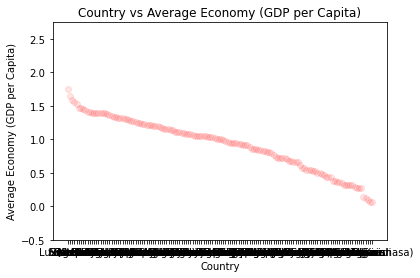

In [31]:
plt.scatter(sorted_economy_gdp["Country"], sorted_economy_gdp["Average Economy (GDP per Capita)"], color='r', alpha=0.1)
plt.xlabel('Country')
plt.ylabel('Average Economy (GDP per Capita)')
plt.title(f'Country vs Average Economy (GDP per Capita)')
plt.ylim(-0.5,(sorted_economy_gdp["Average Economy (GDP per Capita)"].max()+1))
#plt.grid(which='major', linestyle='-')
#plt.grid(which='minor', linestyle=':')
#plt.savefig("../images/LatVsTemp.png")
plt.show()

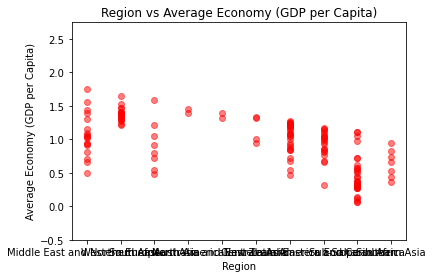

In [30]:
plt.scatter(sorted_economy_gdp["Region"], sorted_economy_gdp["Average Economy (GDP per Capita)"], color='r', alpha=0.5)
plt.xlabel('Region')
plt.ylabel('Average Economy (GDP per Capita)')
plt.title(f'Region vs Average Economy (GDP per Capita)')
plt.ylim(-0.5,(sorted_economy_gdp["Average Economy (GDP per Capita)"].max()+1))
#plt.grid(which='major', linestyle='-')
#plt.grid(which='minor', linestyle=':')
#plt.savefig("../images/LatVsTemp.png")
plt.show()